In [2]:
import numpy as np
import matplotlib.pyplot as plt

### DFT

For the Discrete-Time Fourier Transform we have the following equation:

$X(e^{j \omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{- j \omega n}$

The function DFT(x) implements the discrete fourier transform for a tie series as input

In [6]:
def DFT(X):
    N=len(X)
    X_t=[]
    
    for i in range(N):
        sum=0
        for n in range(N):
            sum=sum+(X[n]*np.exp(-2.j*np.pi*n*i/N))
            
        X_t.append(sum)
        
    return np.array(X_t)


In [252]:
Xn = np.array([2,4,-1,6])

Xk = DFT(Xn)

Text(0, 0.5, 'x(t)')

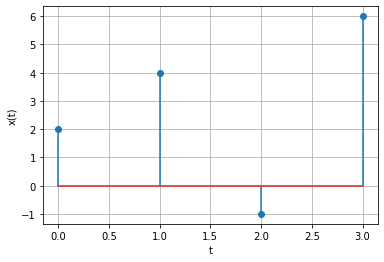

In [253]:
plt.stem(Xn)
plt.grid()
plt.xlabel("t")
plt.ylabel("x(t)")

Text(0, 0.5, '$|F(\\omega)|$')

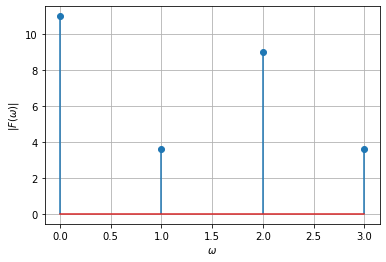

In [254]:
plt.stem(np.abs(Xk))
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("$|F(\omega)|$")

### FFT

Below I have implemented the Fast Fourier Transform algorithm FastFT and used it for a sine signal with a frequency of 150. The frequency domain data do show a peak around 150.

In [15]:
def FastFT(X):
    N=len(X)
    xtemp,xtemp2=np.empty(N,dtype=complex),np.empty(N,dtype=complex)
    ind=np.arange(N)
    W=np.exp(-2j*np.pi*ind/N)
    p=int(np.log2(N))
    for i in range(N):
        j=int(np.base_repr(int(np.binary_repr(i,width=p)[::-1]),10),2)
        xtemp[i]=X[j]
    for i in range(p):
        bfv=2**(i+1)
        bfp=2**(p-i-1)
        for j in range(bfp):
            for k in range(bfv):
                xtemp2[bfv*j+k]=xtemp[bfv*j+k]+W[N//bfv*k]*xtemp[(bfv*j)+(k+(2**i))%bfv] #calculating the Butterfly
        xtemp[:]=xtemp2[:]  
    return xtemp2
    

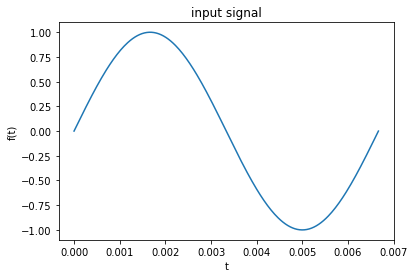

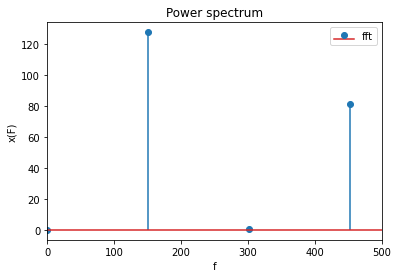

In [259]:
f=150
b=1/150
N=256
x=np.sin(2*np.pi*f*(np.linspace(0,b,N)))

plt.figure()
plt.title("input signal")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.plot(np.linspace(0,b,N),x)
fft_x=FastFT(x)
dft_x=discrete_FT(x)
plt.show()


plt.title('Power spectrum')
plt.xlabel("f")
plt.ylabel("x(F)")

plt.stem(np.linspace(0,1/b*N,N),abs(fft_x),label='fft')
plt.legend()
#plt.xlim(0,1/b*N/2)
plt.xlim(0,500)
plt.show()

Now we use Scipy's very efficient and fast FFT functions to find the fourier transform. The first function doesn't use zero padding whereas "sine_fftN" uses zero padding. We also see the difference in changing the sampling frequencies.

In [260]:
def sine_fft(sample_freq):
    
    
    Fs = sample_freq


    f=5
    b=1

    t = np.arange(0,1,1/Fs)
    x=np.sin(2*np.pi*f*t)
    
    yf = fft(x)
    xf = fftfreq(Fs,1/Fs)

    fig,(ax1, ax2) = plt.subplots(nrows=2,figsize=(10,10))
    ax1.grid()
    ax2.grid()
    ax1.plot(t,x, '-o')
    ax2.stem(xf,np.abs(yf))
    ax2.set_xlim(0,Fs/2)
    
    plt.show()


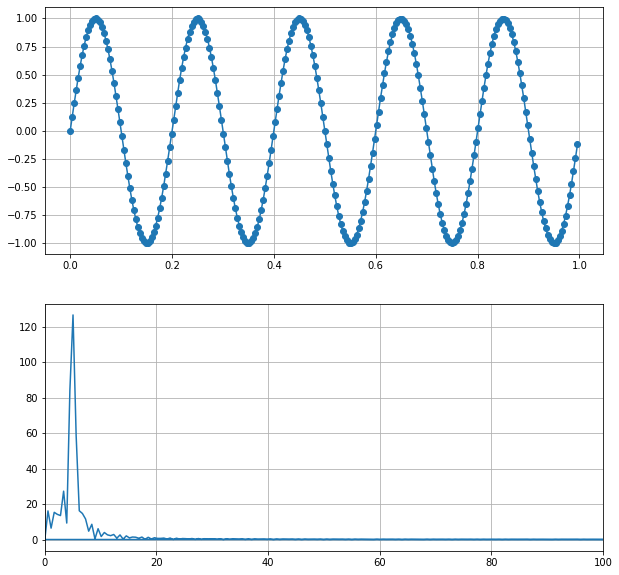

In [184]:
sine_fftN(256)


# 1. Sine Wave

In [180]:
def sine_fftN(sample_freq,zeroN = 200):
    
    Fs = sample_freq
    
    
    f=5
    b=1
    N = b*Fs
    
    t = np.arange(0,1,1/Fs)
    x=np.sin(2*np.pi*f*t)
    
    
    totalN = zeroN + int(N)
    zeropadded_y = np.zeros(zeroN +int(N))
    zeropadded_y[:N] = x

    
    yf = fft(zeropadded_y)
    xf = fftfreq(totalN,1/Fs)
    
    
    fig,(ax1, ax2) = plt.subplots(nrows=2,figsize=(10,10))
    ax1.grid()
    ax2.grid()
    ax1.plot(t,x, '-o')
    ax2.plot(xf,np.abs(yf))
    ax2.set_xlim(0,100)
    
    plt.show()
    
    

In [181]:
np.size(fftfreq(100,1/Fs))

100

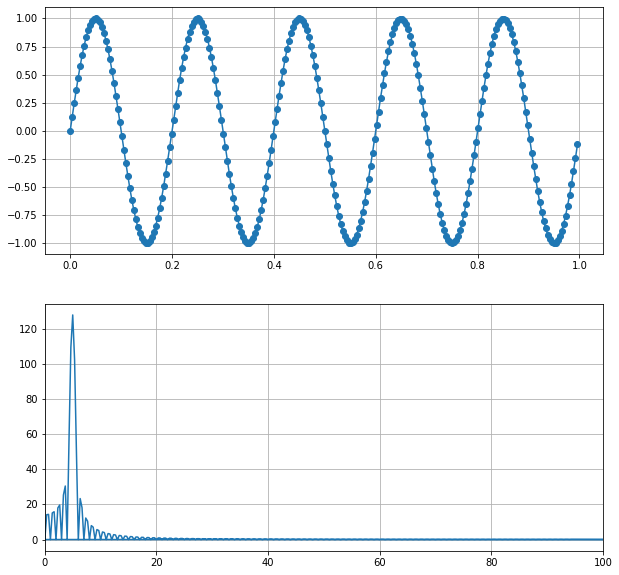

In [186]:
sine_fftN(256,zeroN = 512)

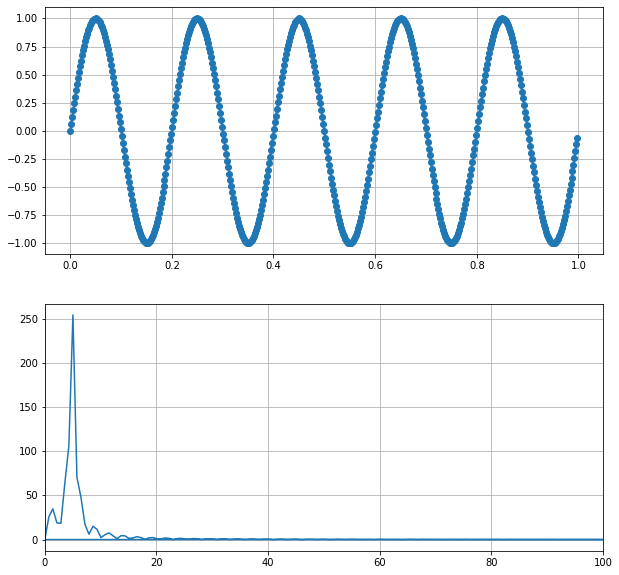

In [185]:
sine_fftN(512)


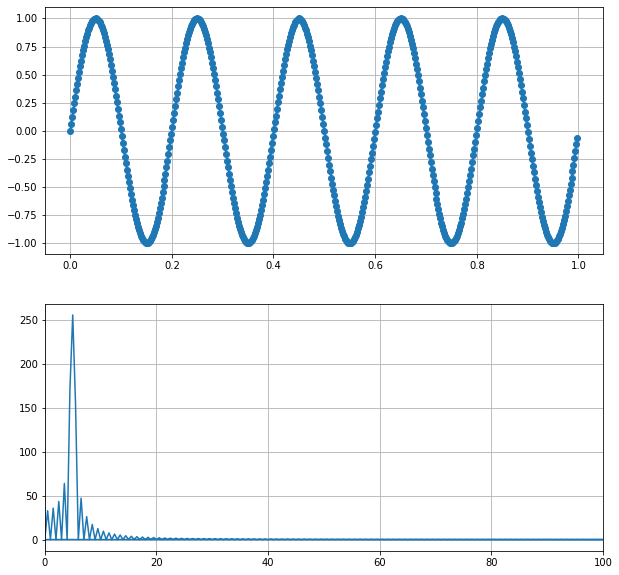

In [189]:
sine_fftN(512,512)

# 2. Cosine Wave and with Phase Shift

In [193]:
def cos_fftN(f,phase,sample_freq,zeroN = 200):
    
    Fs = sample_freq
    
    
    b=1
    N = b*Fs
    
    t = np.arange(0,1,1/Fs)
    x=np.cos(2*np.pi*f*t+phase)
    
    
    totalN = zeroN + int(N)
    zeropadded_y = np.zeros(zeroN +int(N))
    zeropadded_y[:N] = x

    
    yf = fft(zeropadded_y)
    xf = fftfreq(totalN,1/Fs)
    
    
    fig,(ax1, ax2) = plt.subplots(nrows=2,figsize=(10,10))
    ax1.grid()
    ax2.grid()
    ax1.plot(t,x, '-o')
    ax2.plot(xf,np.abs(yf))
    ax2.set_xlim(0,10*f)
    
    plt.show()
    

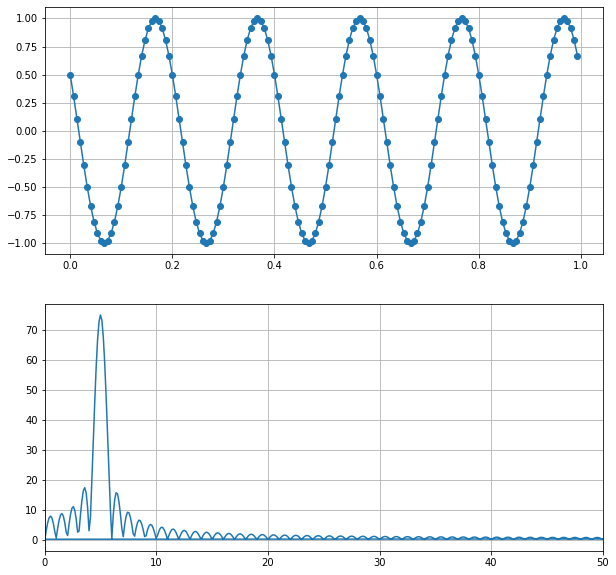

In [194]:
cos_fftN(5,1/3*np.pi,150,1024)

# 4. Square Wave

In [195]:
from scipy import signal

In [208]:
def square_fftN(f,sample_freq,zeroN = 200):
    
    Fs = sample_freq
    

    
    b=1
    N = b*Fs
    
    t = np.arange(0,1,1/Fs)
    x=signal.square(2*np.pi*f*t)
    
    
    totalN = zeroN + int(N)
    zeropadded_y = np.zeros(zeroN +int(N))
    zeropadded_y[:N] = x

    
    yf = fft(zeropadded_y)
    xf = fftfreq(totalN,1/Fs)
    
    
    fig,(ax1, ax2) = plt.subplots(nrows=2,figsize=(10,10))
    ax1.grid()
    ax2.grid()
    ax1.plot(t,x, '-o')
    ax2.plot(xf,np.abs(yf))
    ax2.set_xlim(0,75)
    
    plt.show()

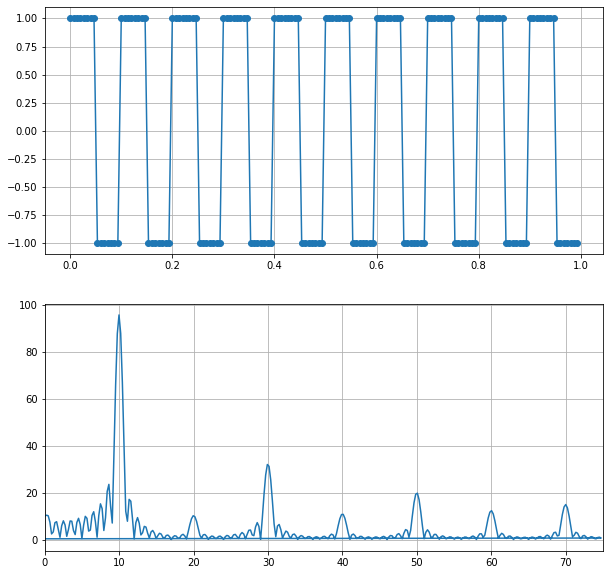

In [209]:
square_fftN(10,150,512)

In [216]:
def squarep_fftN(T,sample_freq,zeroN = 200):
    
    Fs = sample_freq
    

    Nl=1/Fs
    t = np.arange(0,1,Nl)
    
    time_pulse=np.arange(-T,T,Nl)
    time_rest=np.arange(T,5,Nl)
    
    amp=[]
    time=np.arange(-5,5,Nl)
    
    for i in range(len(time_rest)):
        amp.append(0)
    for i in range(len(time_pulse)):
        amp.append(1)
    for i in range(len(time_rest)):
        amp.append(0)
    
    


    
    yf = fft(amp)
    xf = fftfreq(np.size(yf),1/Fs)
    
    
    fig,(ax1, ax2) = plt.subplots(nrows=2,figsize=(10,10))
    ax1.grid()
    ax2.grid()
    ax1.plot(time,amp, '-o')
    ax2.plot(xf,np.abs(yf))
    ax2.set_xlim(0,75)
    
    plt.show()

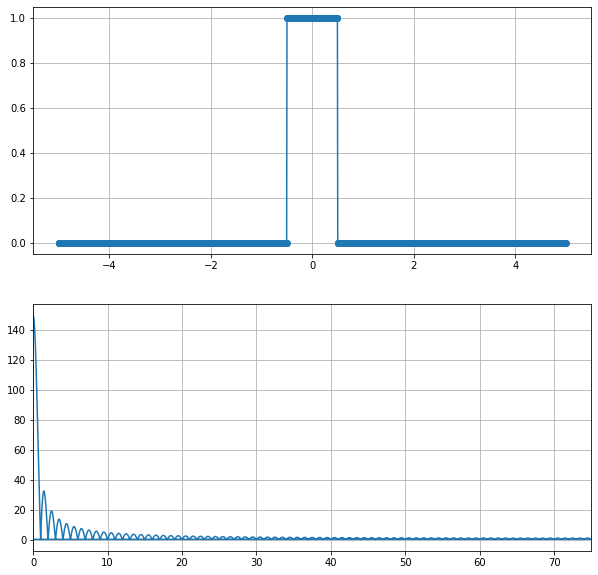

In [217]:
squarep_fftN(0.5,150,512)

In [227]:
def Gauss_fftN(sample_freq,zeroN = 200):
    
    Fs = sample_freq
    

    
    b=1
    N = b*Fs
    
    t = np.arange(-0.5,0.5,1/Fs)
    
    x = 1/(np.sqrt(2*np.pi*0.01))*(np.exp(-t**2/(2*0.01)));
    
    
    
    totalN = zeroN + int(N)
    zeropadded_y = np.zeros(zeroN +int(N))
    zeropadded_y[:N] = x

    
    yf = fft(zeropadded_y)
    xf = fftfreq(totalN,1/Fs)
    
    
    fig,(ax1, ax2) = plt.subplots(nrows=2,figsize=(10,10))
    ax1.grid()
    ax2.grid()
    ax1.plot(t,x, '-o')
    ax2.plot(xf,np.abs(yf))
    ax2.set_xlim(0,30)
    
    plt.show()

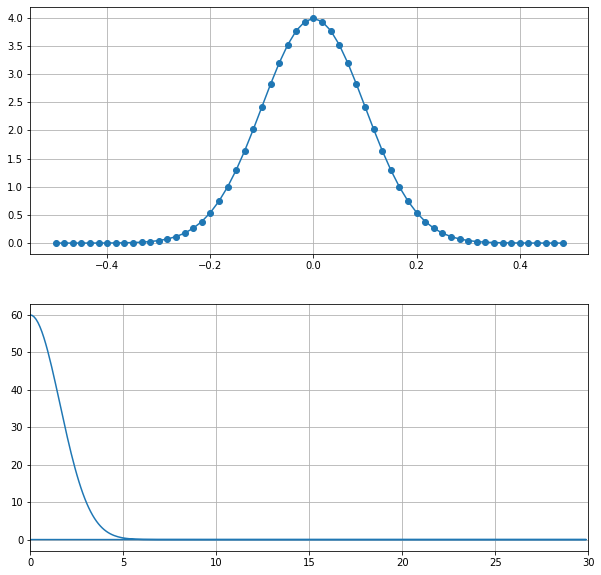

In [228]:
Gauss_fftN(60,512)

In [233]:
def Exp_fftN(sample_freq,zeroN = 200):
    
    Fs = sample_freq
    

    
    b=1
    N = b*Fs
    
    t = np.arange(0,1,1/Fs)
    
    x = 2*np.exp(-5*t);
    
    
    
    totalN = zeroN + int(N)
    zeropadded_y = np.zeros(zeroN +int(N))
    zeropadded_y[:N] = x

    
    yf = fft(zeropadded_y)
    xf = fftfreq(totalN,1/Fs)
    
    
    fig,(ax1, ax2) = plt.subplots(nrows=2,figsize=(10,10))
    ax1.grid()
    ax2.grid()
    ax1.plot(t,x, '-o')
    ax2.plot(xf,np.abs(yf))
    ax2.set_xlim(0,30)
    ax2.set_ylim(0,)
    plt.show()

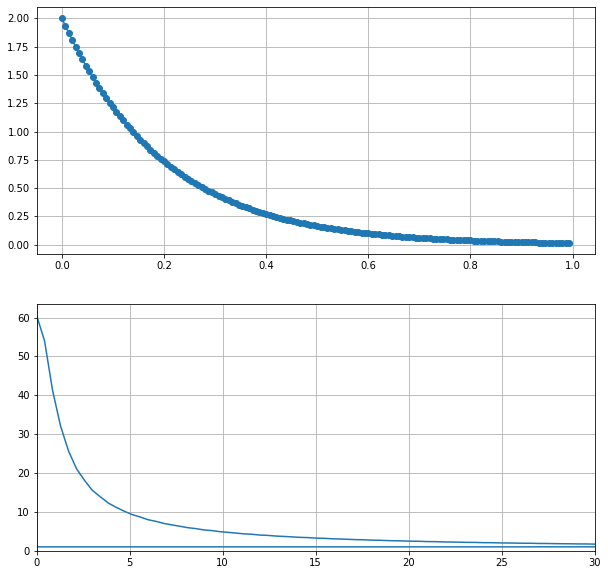

In [234]:
Exp_fftN(150)

In [241]:
def Chirp_fftN(fbegin,fend,sample_freq,zeroN = 200):
    
    Fs = sample_freq
    

    
    b=1
    N = b*Fs
    
    t = np.arange(0,1,1/Fs)
        
    x = signal.chirp(t,f0=fbegin,f1=fend,t1=1,method="linear");
    
    
    
    totalN = zeroN + int(N)
    zeropadded_y = np.zeros(zeroN +int(N))
    zeropadded_y[:N] = x

    
    yf = fft(zeropadded_y)
    xf = fftfreq(totalN,1/Fs)
    
    
    fig,(ax1, ax2) = plt.subplots(nrows=2,figsize=(10,10))
    ax1.grid()
    ax2.grid()
    ax1.plot(t,x, '-o')
    ax2.plot(xf,np.abs(yf))
    ax2.set_xlim(0,30)
    ax2.set_ylim(0,)
    plt.show()

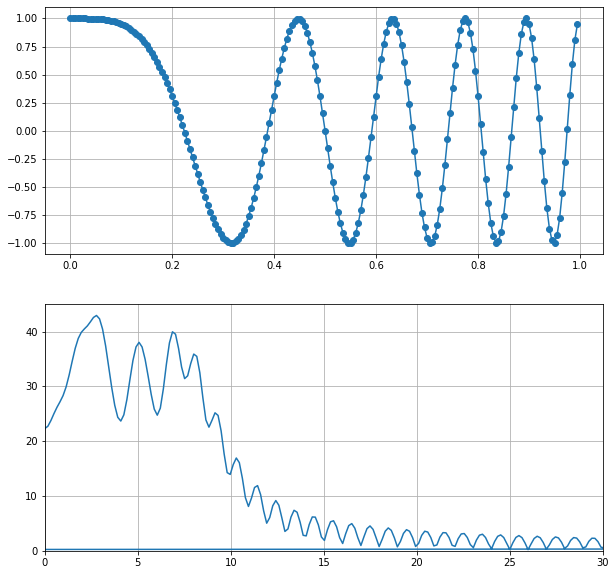

In [251]:
Chirp_fftN(0,10,200,1024)